# Meta Methods applied to NBA players data set

In [36]:
# Import libraries 

import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

df = pd.read_csv("final_data.csv")
df.head()

,FG%,3PA,2P%,eFG%,ORB,DRB,TRB,BLK,Proximity
0,0.439,2.1,0.468,0.486,2.0,4.5,6.5,0.6,0
1,0.547,0.0,0.548,0.547,4.6,5.4,10.0,0.8,0
2,0.557,0.1,0.562,0.557,2.4,7.6,10.1,0.8,0
3,0.402,1.5,0.560,0.424,1.0,1.7,2.7,0.3,0
4,0.550,1.0,0.578,0.566,1.6,3.9,5.5,1.0,0


In [37]:
# No preprocessing needed. Numerical and scaled data
# Separate data from labels

y=df["Proximity"].values
X=df.values[:,0:8]

## Voting scheme

In [38]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=50

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

Best Params fo Knn= {'n_neighbors': 29, 'weights': 'distance'} Accuracy= 0.8371666666666667
Accuracy: 0.793 [Naive Bayes]
Accuracy: 0.837 [Knn (3)]
Accuracy: 0.740 [Dec. Tree]


In [39]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

Accuracy: 0.822 [Majority Voting]


In [40]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,3,1])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.819 [Weighted Voting]


## Bagging

In [41]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]    
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.751 [1]
Accuracy: 0.741 [2]
Accuracy: 0.780 [5]
Accuracy: 0.801 [10]
Accuracy: 0.798 [20]
Accuracy: 0.789 [50]
Accuracy: 0.793 [100]
Accuracy: 0.807 [200]

Accuracy: 0.697 [1]
Accuracy: 0.686 [2]
Accuracy: 0.783 [5]
Accuracy: 0.774 [10]
Accuracy: 0.786 [20]
Accuracy: 0.810 [50]
Accuracy: 0.801 [100]
Accuracy: 0.814 [200]


## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.728 [1]
Accuracy: 0.703 [2]
Accuracy: 0.794 [5]
Accuracy: 0.790 [10]
Accuracy: 0.802 [20]
Accuracy: 0.807 [50]
Accuracy: 0.807 [100]
Accuracy: 0.813 [200]


In [43]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.748 [1]
Accuracy: 0.712 [2]
Accuracy: 0.807 [5]
Accuracy: 0.812 [10]
Accuracy: 0.803 [20]
Accuracy: 0.816 [50]
Accuracy: 0.815 [100]
Accuracy: 0.813 [200]


## Boosting

In [44]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.792 [1]
Accuracy: 0.798 [2]
Accuracy: 0.820 [5]
Accuracy: 0.808 [10]
Accuracy: 0.808 [20]
Accuracy: 0.817 [50]
Accuracy: 0.817 [100]
Accuracy: 0.813 [200]


In [45]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.774 [1]
Accuracy: 0.790 [2]
Accuracy: 0.781 [5]
Accuracy: 0.791 [10]
Accuracy: 0.791 [20]
Accuracy: 0.809 [50]
Accuracy: 0.796 [100]
Accuracy: 0.794 [200]


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.645 [1]
Accuracy: 0.645 [2]
Accuracy: 0.778 [5]
Accuracy: 0.816 [10]
Accuracy: 0.817 [20]
Accuracy: 0.821 [50]
Accuracy: 0.820 [100]
Accuracy: 0.808 [200]


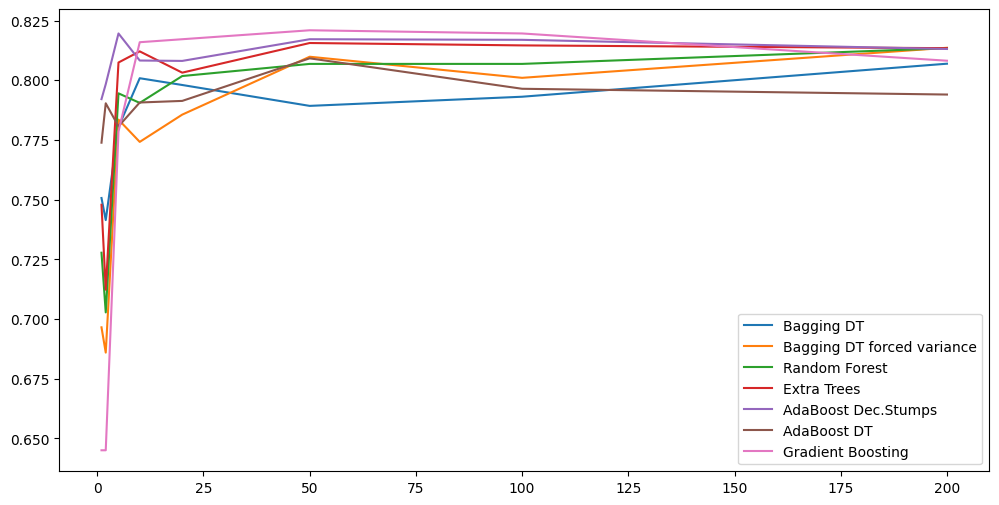

In [47]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

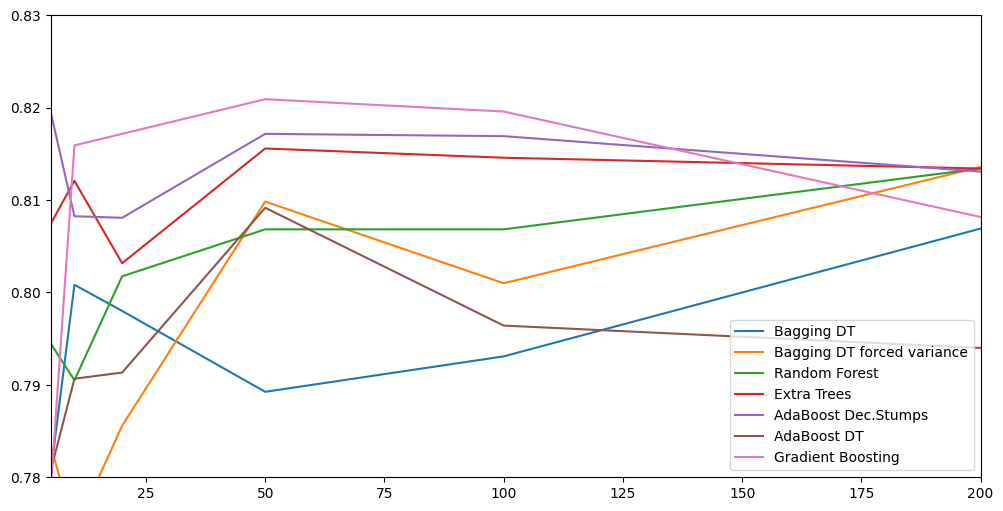

In [48]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')
plt.xlim(5,200)
plt.ylim(0.78,0.83)
plt.show()

## Feature Selection with Forests of trees

In [49]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  


[0.15023123 0.14621678 0.10415871 0.09080952 0.20733361 0.07722243
 0.11964729 0.10438042]


In [50]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='accuracy')))

(794, 8)
0.7870833333333332
0.7870833333333332


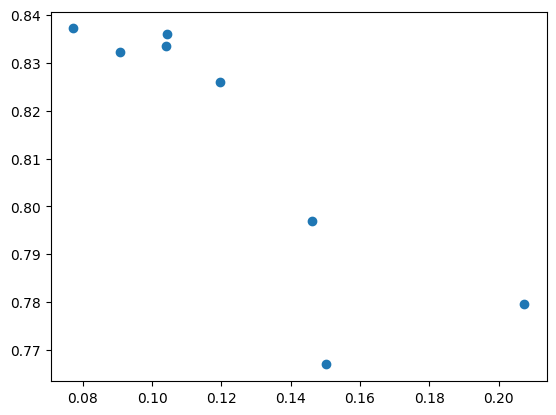

Best threshold:  0.07722243248928853


In [51]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [52]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)
print(X_new.shape)

print('Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cv, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cv, scoring='accuracy')))

(794, 8)
Original:  0.765
With FS:  0.8371666666666667
